In [1]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
df = pd.read_csv('/Users/vijayc/Downloads/US_Housing_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

From the data set above, there is lot of missing data for columns named Alley, MasVnrType, FireplaceQu, PoolQC, Fence, MiscFeature.
Hence, these columns are removed from data set to build model.

Unique values in column MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH'] Unique values in column Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes', 'OldTown' 'BrkSide'
'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR' 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill' 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

Unique values in column HouseStyle: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] Unique values in column RoofStyle: ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed'] Unique values in column RoofMatl: ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll' 'ClyTile'] Unique values in column Exterior2nd: ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd' 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone' 'Other' 'CBlock'] Unique values in column Foundation: ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone'] Unique values in column Heating: ['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor'] Unique values in column Electrical: ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan] Unique values in column SaleType: ['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth'] Unique values in column SaleCondition: ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']

In [25]:
# rdf is df after removing columns that are missing in data at high percentage
rdf = df.drop(columns = ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'MSZoning', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior2nd', 'Foundation', 'Heating', 'Electrical', 'SaleType', 'SaleCondition', 'MSSubClass', 'Id'])
rdf.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [27]:
rdf['LotFrontage'].corr(rdf['SalePrice'])

0.35179909657067804

<Axes: >

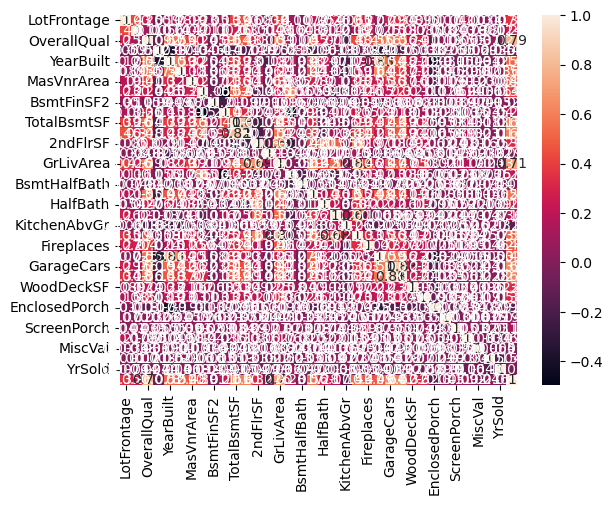

In [29]:
correlation = rdf.corr(numeric_only = True)
sns.heatmap(correlation, annot = True)

In [31]:
categorical_columns = rdf.select_dtypes(['object']).columns
for column in categorical_columns:
    print(f"Unique values in column {column}: {rdf[column].unique()}")
print(f"Total categorical column in dataset is: {len(categorical_columns)}")

Unique values in column Street: ['Pave' 'Grvl']
Unique values in column LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
Unique values in column LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
Unique values in column Utilities: ['AllPub' 'NoSeWa']
Unique values in column LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Unique values in column LandSlope: ['Gtl' 'Mod' 'Sev']
Unique values in column Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Unique values in column Condition2: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Unique values in column BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
Unique values in column Exterior1st: ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
Unique values in column ExterQual: ['Gd' 'TA' 'Ex' 'Fa']
Unique values in column ExterCond: ['TA' 'Gd' 'Fa' 'Po' 'Ex']
Unique values in column BsmtQual: ['Gd' 'TA' 'Ex' nan 'Fa

In [61]:
# Applying Ordinal encoding techniques for some of the Caterogical data columns
# Unique values in column Street: ['Pave' 'Grvl']
Street_map = {"Grvl": 0, "Pave": 1}
rdf['Street'] = df['Street'].map(Street_map)

# Unique values in column LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
LotShape_map = {"IR3": 0, "IR2": 1, "IR1": 2, "Reg": 3}
rdf['LotShape'] = rdf['LotShape'].map(LotShape_map)

# Unique values in column LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
LandContour_map = {"Low": 0, "Lvl": 1, "Bnk": 2, "HLS": 3}
rdf['LandContour'] = rdf['LandContour'].map(LandContour_map)

# Unique values in column Utilities: ['AllPub' 'NoSeWa']
Utilities_map = {"NoSeWa": 0, "AllPub": 1}
rdf['Utilities'] = rdf['Utilities'].map(Utilities_map)

# Unique values in column LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LotConfig_map = {"Inside": 0, "FR2": 1, "FR3": 2, "Corner":3, "CulDSac":4}
rdf['LotConfig'] = rdf['LotConfig'].map(Utilities_map)

In [63]:
#rdf['LotShape'].unique()
categorical_columns = rdf.select_dtypes(['object']).columns
for column in categorical_columns:
    print(f"Unique values in column {column}: {rdf[column].unique()}")

Unique values in column LandSlope: ['Gtl' 'Mod' 'Sev']
Unique values in column Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Unique values in column Condition2: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Unique values in column BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
Unique values in column Exterior1st: ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
Unique values in column ExterQual: ['Gd' 'TA' 'Ex' 'Fa']
Unique values in column ExterCond: ['TA' 'Gd' 'Fa' 'Po' 'Ex']
Unique values in column BsmtQual: ['Gd' 'TA' 'Ex' nan 'Fa']
Unique values in column BsmtCond: ['TA' 'Gd' nan 'Fa' 'Po']
Unique values in column BsmtExposure: ['No' 'Gd' 'Mn' 'Av' nan]
Unique values in column BsmtFinType1: ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
Unique values in column BsmtFinType2: ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
Unique values in

In [83]:
numerical_columns = rdf.select_dtypes(['int64', 'float64']).columns
#for column in numerical_columns:
    #print(f"Unique values in column {column}")
print(f"Total numerical column in dataset is: {len(numerical_columns)}")

Total numerical column in dataset is: 41


<Axes: >

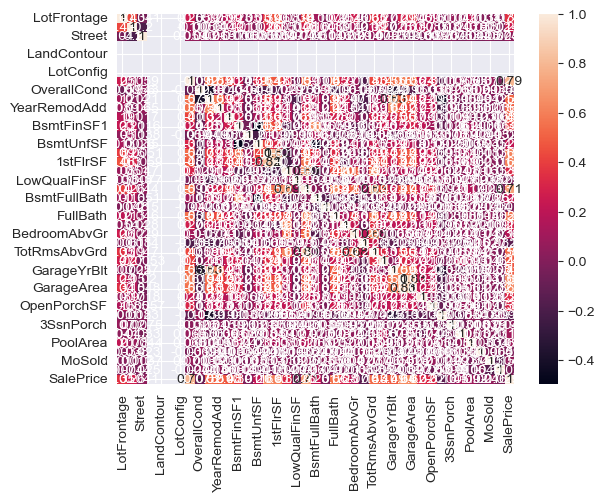

In [67]:
correlation = rdf.corr(numeric_only = True)
sns.heatmap(correlation, annot = True)

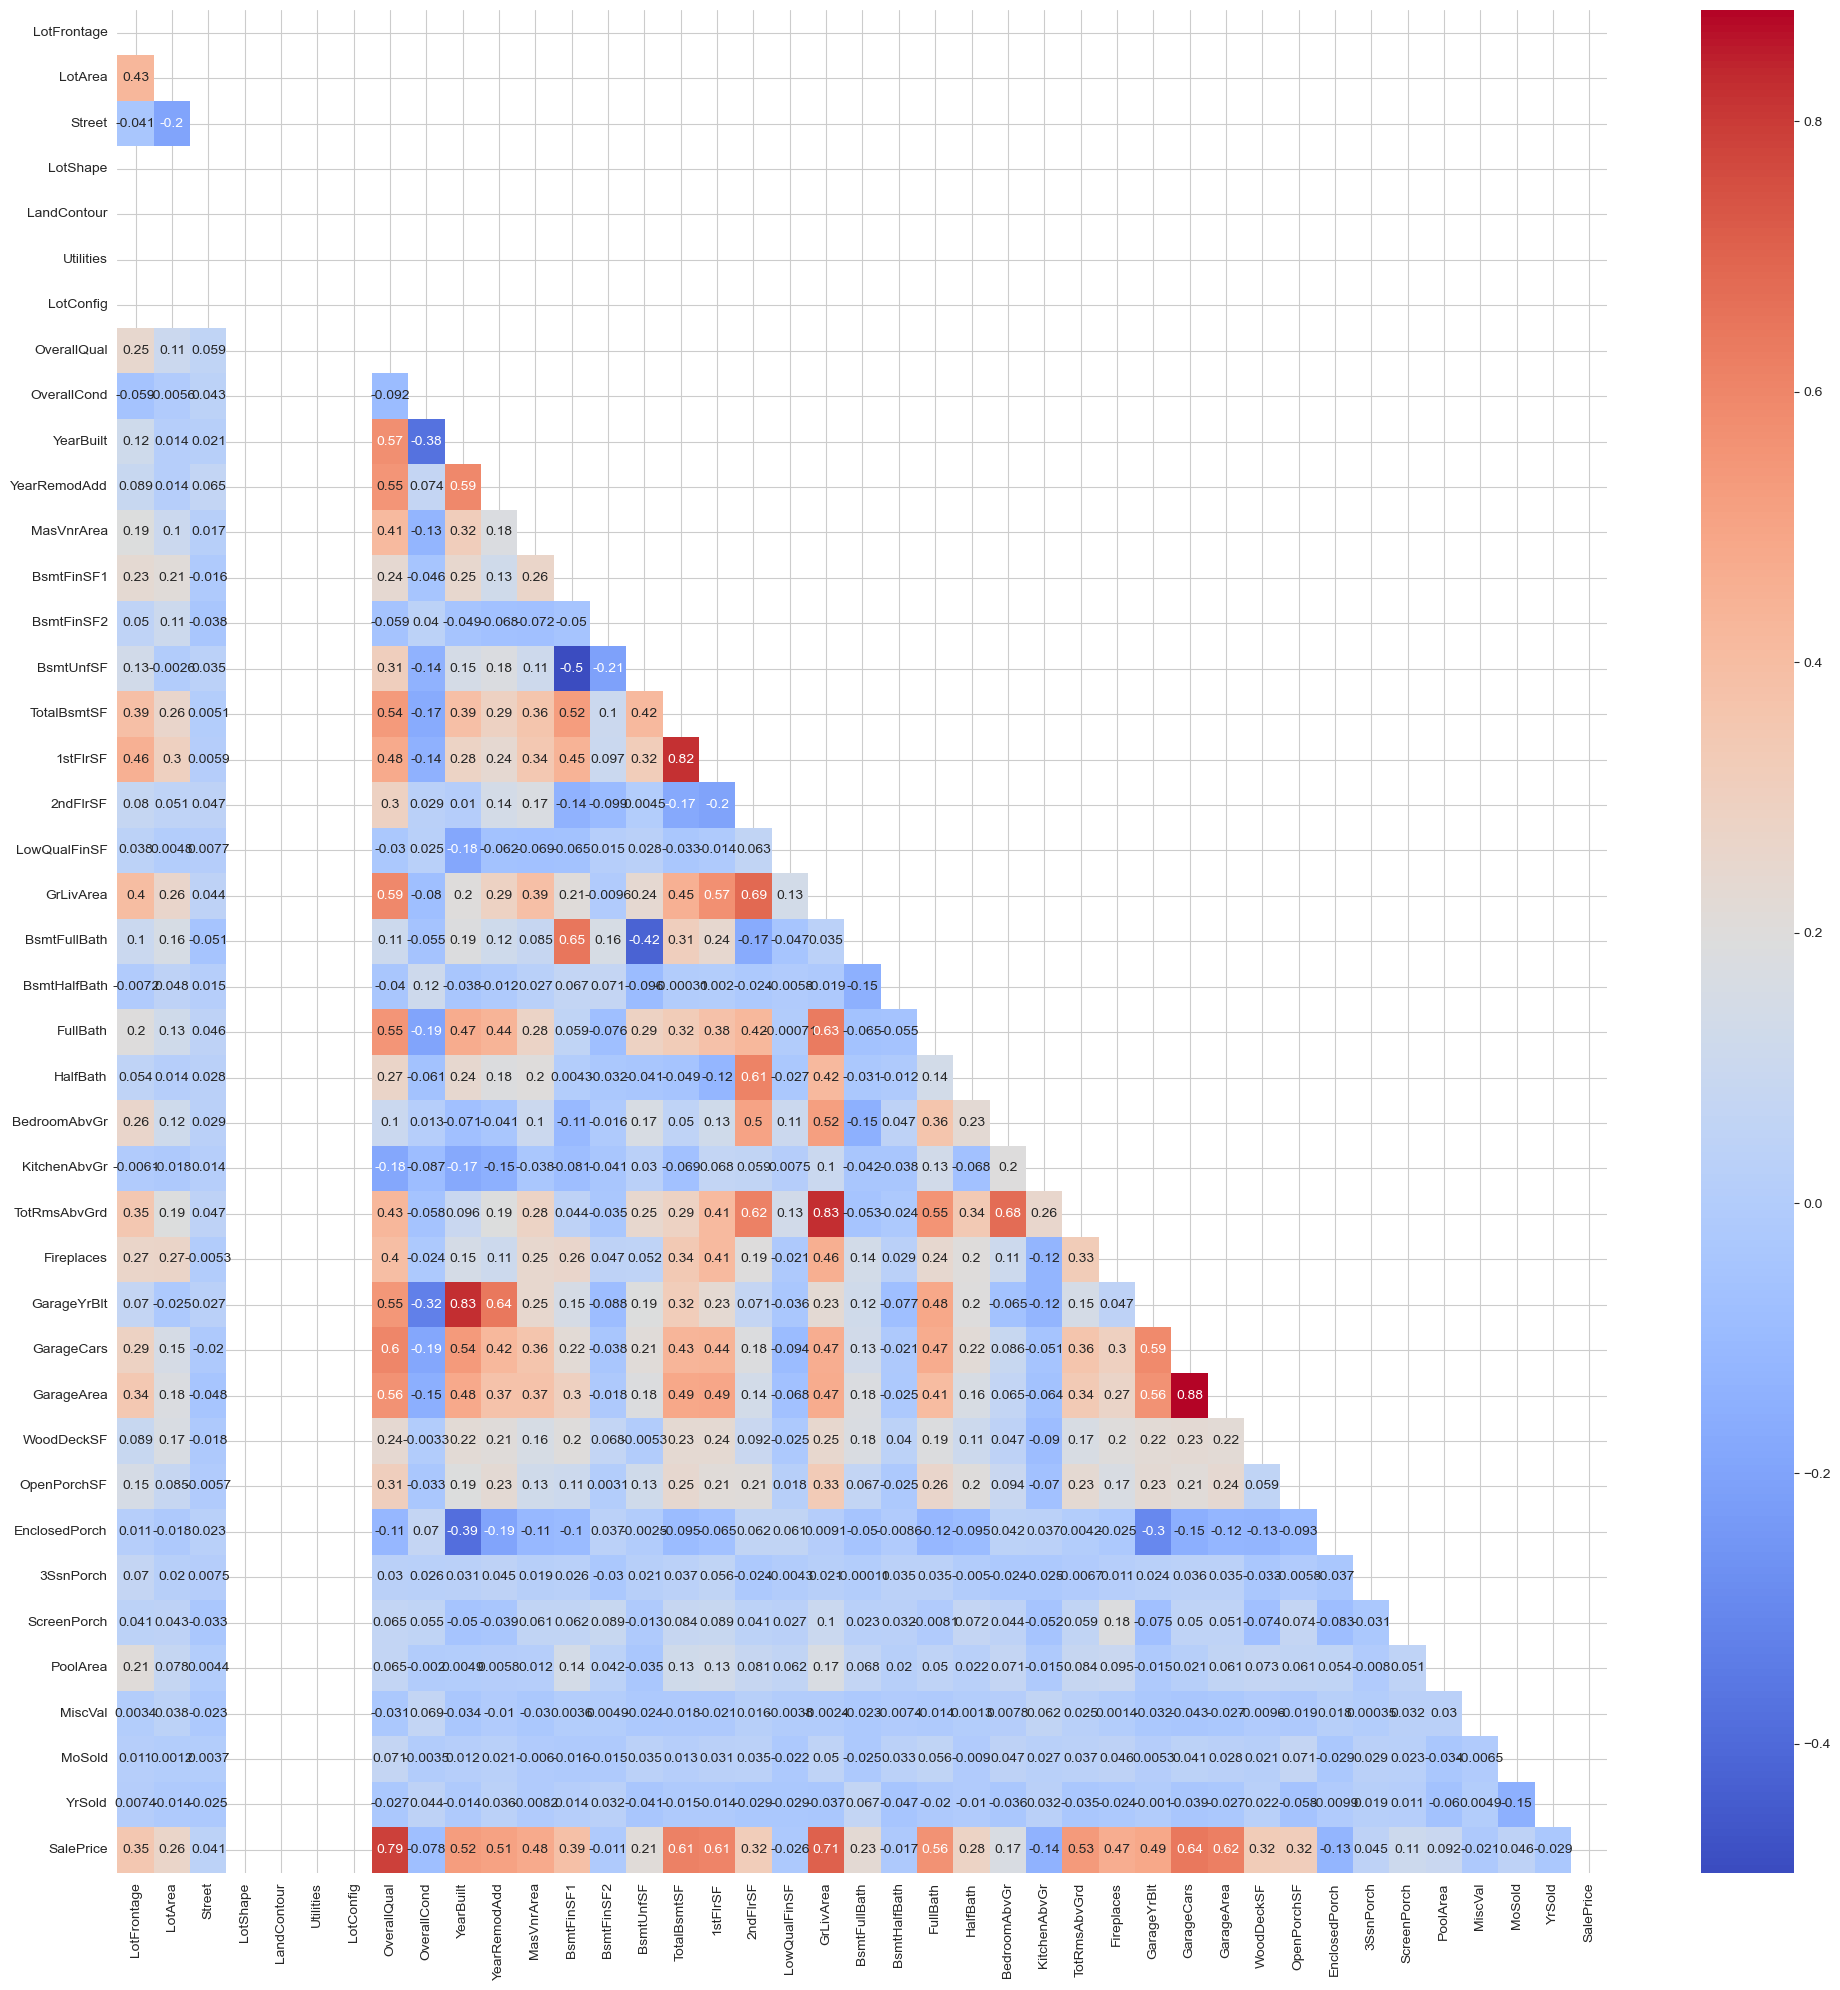

In [68]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,20))
corr = rdf[numerical_columns].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap='coolwarm',mask=mask)
plt.tight_layout()

In [70]:
from sklearn.preprocessing import OrdinalEncoder
cdf = pd.DataFrame(OrdinalEncoder().fit_transform(rdf[categorical_columns]), columns=categorical_columns)

In [73]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LandSlope     1460 non-null   float64
 1   Condition1    1460 non-null   float64
 2   Condition2    1460 non-null   float64
 3   BldgType      1460 non-null   float64
 4   Exterior1st   1460 non-null   float64
 5   ExterQual     1460 non-null   float64
 6   ExterCond     1460 non-null   float64
 7   BsmtQual      1423 non-null   float64
 8   BsmtCond      1423 non-null   float64
 9   BsmtExposure  1422 non-null   float64
 10  BsmtFinType1  1423 non-null   float64
 11  BsmtFinType2  1422 non-null   float64
 12  HeatingQC     1460 non-null   float64
 13  CentralAir    1460 non-null   float64
 14  KitchenQual   1460 non-null   float64
 15  Functional    1460 non-null   float64
 16  GarageType    1379 non-null   float64
 17  GarageFinish  1379 non-null   float64
 18  GarageQual    1379 non-null 

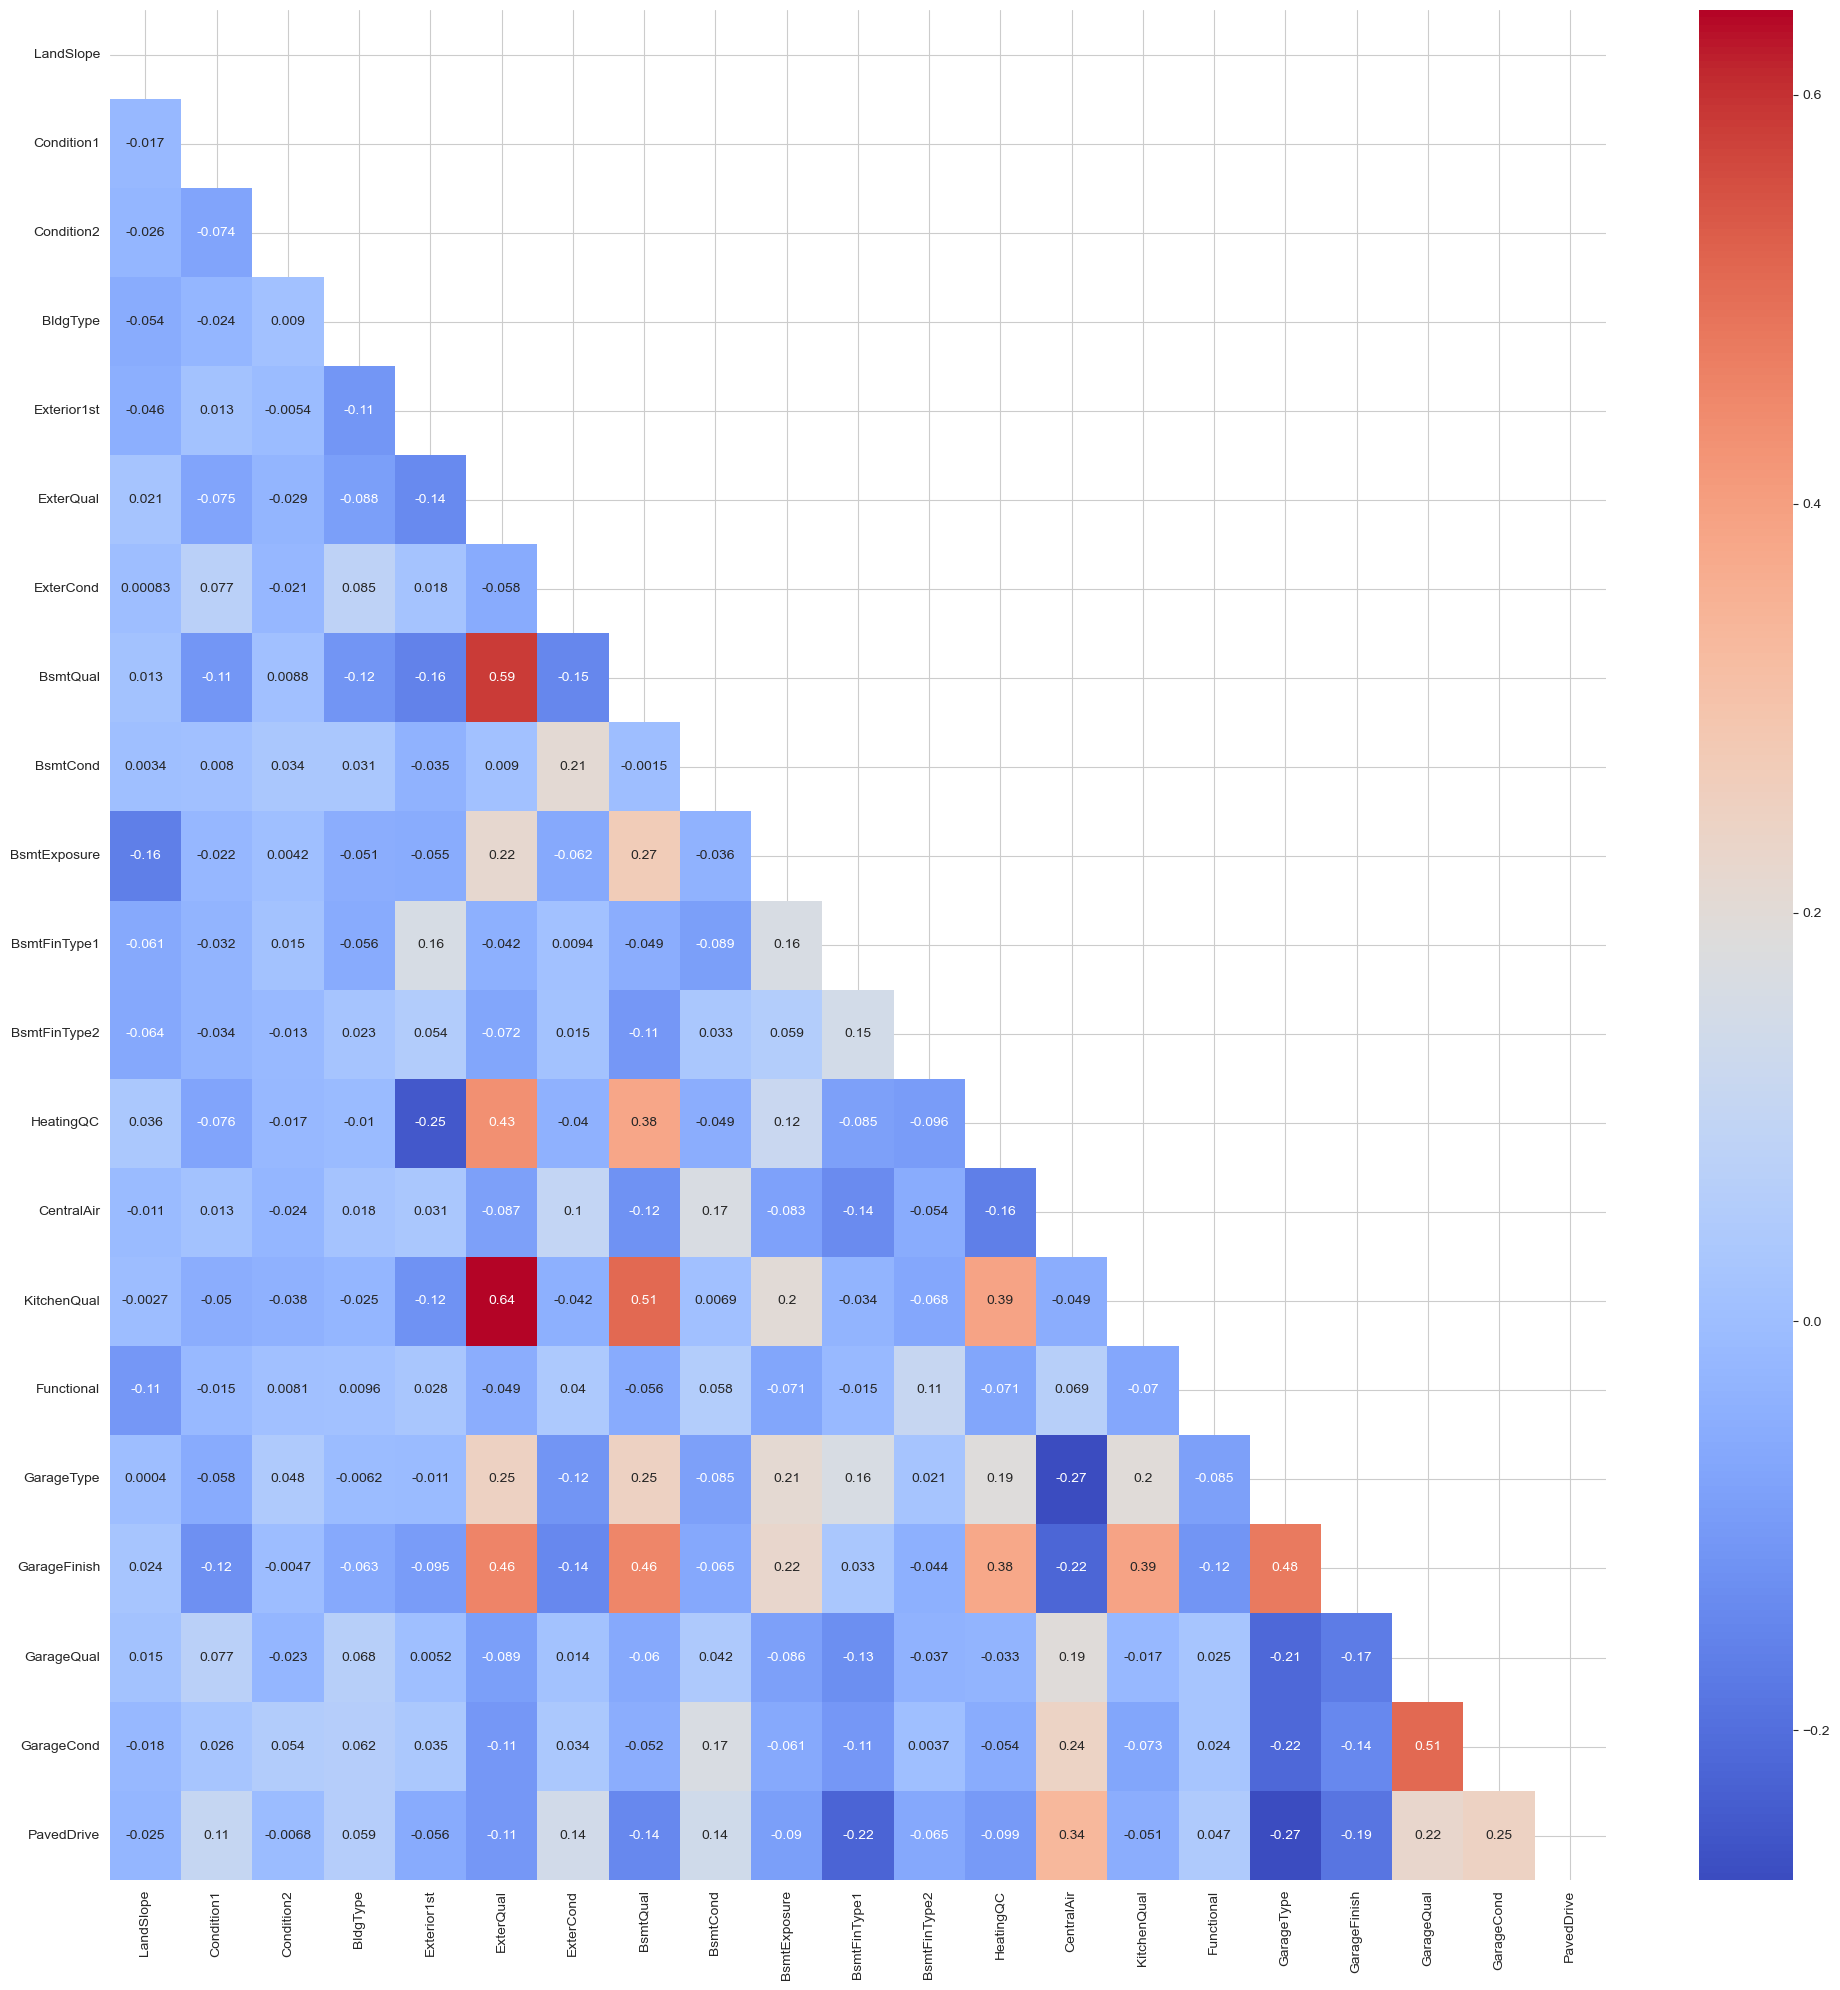

In [75]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,20))
corr = cdf[categorical_columns].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap='coolwarm',mask=mask)
plt.tight_layout()

In [87]:
import math
sns.set_style('darkgrid')
total_plots = len(numerical_columns)
rows = math.ceil(total_plots / 4)
cols = 4

#plt.figure(figsize=(20,20))
#for index, feature in enumerate(numerical_columns):
#    plt.subplot(rows, cols, index + 1)
#    #plt.subplot(6,4,index+1)
#    sns.histplot(np.where(rdf[feature]==0,np.log(rdf[feature]+0.002),np.log(rdf[feature])),kde=True, color='g')
#    plt.xlabel(feature)
#    plt.ylabel('distribution')
#    plt.title(f"{feature} distribution")

#plt.tight_layout()